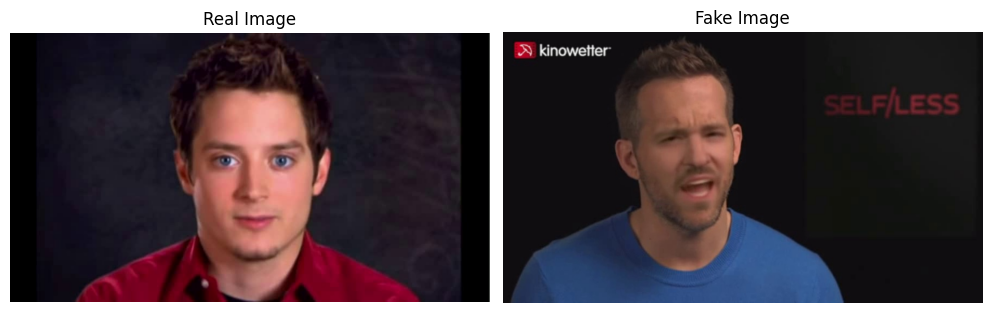

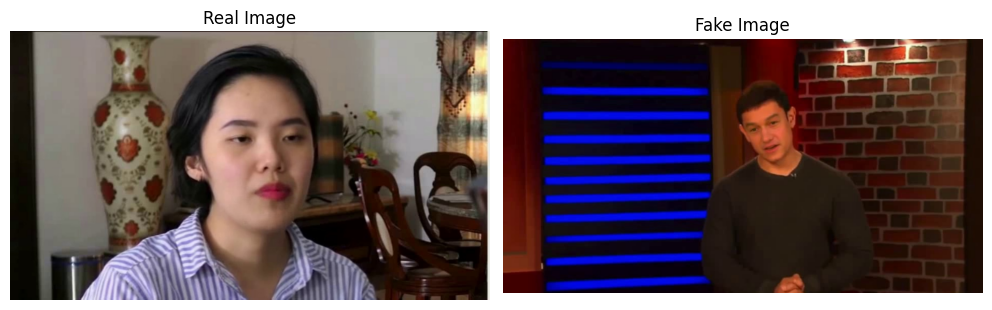

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace these with your image paths
real_image1_path = r'..\Dataset\Train\Frames\Real Frames\00006_frame_12.jpg'
real_image2_path = r'..\Dataset\Train\Frames\Real Frames\00000_frame_9.jpg'
fake_image1_path = '..\Dataset\Train\Frames\DeepFake Frames\id3_id35_0009_frame_2.jpg'
fake_image2_path = '..\Dataset\Train\Frames\DeepFake Frames\id0_id26_0000_frame_1.jpg'

# Load the images
real_image1 = mpimg.imread(real_image1_path)
real_image2 = mpimg.imread(real_image2_path)
fake_image1 = mpimg.imread(fake_image1_path)
fake_image2 = mpimg.imread(fake_image2_path)

# Plot the first row
fig1, axes1 = plt.subplots(1, 2, figsize=(10, 5))

axes1[0].imshow(real_image1)
axes1[0].set_title("Real Image")
axes1[0].axis('off')

axes1[1].imshow(fake_image1)
axes1[1].set_title("Fake Image")
axes1[1].axis('off')

plt.tight_layout(pad=1.0)
plt.subplots_adjust(top=0.85)
plt.show()

# Plot the second row
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))

axes2[0].imshow(real_image2)
axes2[0].set_title("Real Image")
axes2[0].axis('off')

axes2[1].imshow(fake_image2)
axes2[1].set_title("Fake Image")
axes2[1].axis('off')

plt.tight_layout(pad=1.0)
plt.subplots_adjust(top=0.85)
plt.show()

In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
from moviepy.editor import VideoFileClip
from tensorflow.keras.applications.resnet50 import preprocess_input

In [30]:
# Load the model
model = tf.keras.models.load_model('resnet50_new_model.h5')

In [16]:
model = tf.keras.models.load_model('resnet50_model.h5')

In [31]:
def preprocess_image_o(image, target_size=(224, 224)):
    image = cv2.resize(image, target_size)  # Resize the image to the target size
    image = image.astype(np.float32) / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = preprocess_input(image)  # Preprocess using ResNet's preprocessing function
    return image

def predict_video(video_path, model):
    video = VideoFileClip(video_path)
    frame_count = 0
    deepfake_count = 0

    for frame in video.iter_frames():
        frame_count += 1
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert to BGR format for OpenCV
        preprocessed_frame = preprocess_image_o(frame)
        prediction = model.predict(preprocessed_frame, verbose=0)
        is_deepfake = prediction[0][0] < 0.5  # Adjust based on labeling

        if is_deepfake:
            deepfake_count += 1

    # Calculate the percentage of deepfake frames
    deepfake_percentage = (deepfake_count / frame_count) * 100
    return deepfake_percentage

In [32]:
def process_videos_in_folder(folder_path, model):
    results = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(('.mp4', '.avi', '.mov')):
            video_path = os.path.join(folder_path, filename)
            deepfake_percentage = predict_video(video_path, model)
            results[filename] = deepfake_percentage
            print(f"Video: {filename}, DeepFake Percentage: {deepfake_percentage:.2f}%")
    return results

In [34]:
# Set the path to the folder containing the videos
folder_path = 'ttt'

# Process all videos in the folder
results = process_videos_in_folder(folder_path, model)

Video: 00000.mp4, DeepFake Percentage: 0.00%


  warnings.warn("Warning: in file %s, "%(self.filename)+



Video: 00002.mp4, DeepFake Percentage: 0.00%
Video: 00003.mp4, DeepFake Percentage: 0.00%
Video: 00004.mp4, DeepFake Percentage: 0.00%
Video: 00005.mp4, DeepFake Percentage: 0.00%
Video: 00006.mp4, DeepFake Percentage: 0.00%
Video: 00008.mp4, DeepFake Percentage: 0.00%


  warnings.warn("Warning: in file %s, "%(self.filename)+



Video: 00009.mp4, DeepFake Percentage: 0.00%


  warnings.warn("Warning: in file %s, "%(self.filename)+



Video: 00010.mp4, DeepFake Percentage: 0.00%


  warnings.warn("Warning: in file %s, "%(self.filename)+



Video: 00011.mp4, DeepFake Percentage: 0.00%


  warnings.warn("Warning: in file %s, "%(self.filename)+



Video: 00014.mp4, DeepFake Percentage: 0.00%
Video: 00015.mp4, DeepFake Percentage: 0.00%
Video: 00016.mp4, DeepFake Percentage: 0.00%
Video: 00017.mp4, DeepFake Percentage: 0.00%


In [35]:
# Set the path to the folder containing the videos
folder_path = 'ttt1'

# Process all videos in the folder
results = process_videos_in_folder(folder_path, model)

Video: id2_id16_0000.mp4, DeepFake Percentage: 0.00%
Video: id2_id16_0001.mp4, DeepFake Percentage: 0.00%
Video: id2_id16_0004.mp4, DeepFake Percentage: 0.00%
Video: id2_id16_0005.mp4, DeepFake Percentage: 0.00%


  warnings.warn("Warning: in file %s, "%(self.filename)+



Video: id2_id16_0006.mp4, DeepFake Percentage: 0.00%


  warnings.warn("Warning: in file %s, "%(self.filename)+



Video: id2_id16_0007.mp4, DeepFake Percentage: 0.00%
Video: id2_id16_0009.mp4, DeepFake Percentage: 0.00%
Video: id2_id17_0000.mp4, DeepFake Percentage: 0.00%
Video: id2_id6_0005.mp4, DeepFake Percentage: 0.00%
Video: id2_id6_0008.mp4, DeepFake Percentage: 0.00%
Video: id2_id6_0009.mp4, DeepFake Percentage: 0.00%
Video: id2_id9_0002.mp4, DeepFake Percentage: 0.00%


  warnings.warn("Warning: in file %s, "%(self.filename)+



Video: id2_id9_0006.mp4, DeepFake Percentage: 0.00%


  warnings.warn("Warning: in file %s, "%(self.filename)+



Video: id2_id9_0007.mp4, DeepFake Percentage: 0.00%
Video: id2_id9_0008.mp4, DeepFake Percentage: 0.00%


In [ ]:
for video, percentage in results.items():
    print(f"Video: {video}, DeepFake Percentage: {percentage:.2f}%")

Video: id2_id16_0000.mp4, DeepFake Percentage: 100.00%
Video: id2_id16_0001.mp4, DeepFake Percentage: 28.72%
Video: id2_id16_0004.mp4, DeepFake Percentage: 44.84%
Video: id2_id16_0005.mp4, DeepFake Percentage: 52.12%
Video: id2_id16_0006.mp4, DeepFake Percentage: 23.10%
Video: id2_id16_0007.mp4, DeepFake Percentage: 88.75%
Video: id2_id16_0009.mp4, DeepFake Percentage: 48.14%
Video: id2_id17_0000.mp4, DeepFake Percentage: 100.00%
Video: id2_id6_0005.mp4, DeepFake Percentage: 98.70%
Video: id2_id6_0008.mp4, DeepFake Percentage: 78.68%
Video: id2_id6_0009.mp4, DeepFake Percentage: 69.57%
Video: id2_id9_0002.mp4, DeepFake Percentage: 26.04%
Video: id2_id9_0006.mp4, DeepFake Percentage: 11.55%
Video: id2_id9_0007.mp4, DeepFake Percentage: 51.17%
Video: id2_id9_0008.mp4, DeepFake Percentage: 28.10%


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

In [21]:
# Load the model
model = tf.keras.models.load_model('resnet50_model.h5')

In [22]:
# Function to preprocess the image
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
    img_array /= 255.0  # Normalize the image
    return img_array

# Function to get prediction
def get_prediction(image_path, model):
    preprocessed_image = preprocess_image(image_path, target_size=(224, 224))  # Change target_size as needed
    prediction = model.predict(preprocessed_image)
    return prediction

In [23]:
# Example usage
image_path = r'Dataset\Train\Frames\Real Frames\id61_0004_frame_10.jpg'
prediction = get_prediction(image_path, model)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: [[0.6718142]]


In [24]:
# Example usage
image_path = r"Dataset\Train\Frames\DeepFake Frames\id0_id28_0005_frame_0.jpg"
prediction = get_prediction(image_path, model)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: [[0.68977547]]


In [44]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the model
model = tf.keras.models.load_model('resnet50_model.h5')

In [ ]:
# Define function to preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)  # Preprocess using ResNet's preprocessing function
    return img

# Process all images in the folder
def process_images_in_folder_d(folder_path, model):
    c = 0
    tc = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            tc = tc + 1
            image_path = os.path.join(folder_path, filename)
            preprocessed_image = preprocess_image(image_path)
            prediction = model.predict(preprocessed_image, verbose=0)
            if prediction[0][0] < 0.5:
                print(f"Image: {filename}, Prediction: {prediction[0][0]}")
                c = c + 1
    print("tc: ",tc)
    print("c: ",c)

In [58]:
# Set the path to the folder containing the images
folder_path = 'Dataset\Train\Frames\DeepFake Frames'

# Process all images in the folder
process_images_in_folder_d(folder_path, model)

Image: id0_id16_0001_frame_0.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0001_frame_1.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0001_frame_2.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0002_frame_0.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0002_frame_1.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0002_frame_2.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0003_frame_0.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0003_frame_1.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0003_frame_2.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0005_frame_0.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0005_frame_1.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0005_frame_2.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0006_frame_0.jpg, Prediction: 0.1771094799041748
Image: id0_id16_0006_frame_1.jpg, Prediction: 0.05995408073067665
Image: id0_id16_0006_frame_2.jpg, Prediction: 0.05995408073067665
Image: id0_

In [59]:
# Process all images in the folder
def process_images_in_folder_r(folder_path, model):
    c = 0
    tc = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            tc = tc + 1
            image_path = os.path.join(folder_path, filename)
            preprocessed_image = preprocess_image(image_path)
            prediction = model.predict(preprocessed_image, verbose=0)
            if prediction[0][0] > 0.5:
                print(f"Image: {filename}, Prediction: {prediction[0][0]}")
                c = c + 1
    print("tc: ",tc)
    print("c: ",c)

In [60]:
# Set the path to the folder containing the images
folder_path = 'Dataset\Train\Frames\DeepFake Frames'

# Process all images in the folder
process_images_in_folder_r(folder_path, model)

Image: id0_id16_0008_frame_0.jpg, Prediction: 0.7270302772521973
Image: id0_id17_0007_frame_1.jpg, Prediction: 0.5621265172958374
Image: id0_id1_0007_frame_1.jpg, Prediction: 0.6527642011642456
Image: id0_id1_0007_frame_2.jpg, Prediction: 0.6720660924911499
Image: id0_id20_0007_frame_1.jpg, Prediction: 0.5218158960342407
Image: id0_id20_0007_frame_2.jpg, Prediction: 0.6965776085853577
Image: id0_id23_0000_frame_2.jpg, Prediction: 0.5385810136795044
Image: id0_id28_0007_frame_1.jpg, Prediction: 0.5007323026657104
Image: id0_id28_0009_frame_2.jpg, Prediction: 0.8371198773384094
Image: id0_id2_0007_frame_1.jpg, Prediction: 0.6617103815078735
Image: id0_id3_0007_frame_1.jpg, Prediction: 0.6493028402328491
Image: id0_id3_0007_frame_2.jpg, Prediction: 0.7453970909118652
Image: id0_id3_0009_frame_2.jpg, Prediction: 0.7323739528656006
Image: id0_id6_0007_frame_2.jpg, Prediction: 0.5686590671539307
Image: id0_id9_0007_frame_1.jpg, Prediction: 0.7475485801696777
Image: id0_id9_0007_frame_2.jpg, 

In [3]:
import os

def rename_videos(folder_path, new_name_prefix="video"):
    # List all files in the specified folder
    files = os.listdir(folder_path)
    
    # Filter for video files (e.g., by common extensions)
    video_files = [f for f in files if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]
    
    # Loop through video files and rename each
    for i, filename in enumerate(video_files, start=1):
        # Define the new name for each video
        new_name = f"{new_name_prefix}_{i}{os.path.splitext(filename)[1]}"
        # Define the full paths for renaming
        src = os.path.join(folder_path, filename)
        dst = os.path.join(folder_path, new_name)
        
        # Rename the video
        os.rename(src, dst)
        print(f"Renamed '{filename}' to '{new_name}'")

# Example usage
folder_path = "../ttt1"
rename_videos(folder_path, new_name_prefix="vid")

Renamed 'vissd_1.mp4' to 'vid_1.mp4'
Renamed 'vissd_10.mp4' to 'vid_2.mp4'
Renamed 'vissd_11.mp4' to 'vid_3.mp4'
Renamed 'vissd_12.mp4' to 'vid_4.mp4'
Renamed 'vissd_13.mp4' to 'vid_5.mp4'
Renamed 'vissd_14.mp4' to 'vid_6.mp4'
Renamed 'vissd_15.mp4' to 'vid_7.mp4'
Renamed 'vissd_16.mp4' to 'vid_8.mp4'
Renamed 'vissd_17.mp4' to 'vid_9.mp4'
Renamed 'vissd_18.mp4' to 'vid_10.mp4'
Renamed 'vissd_19.mp4' to 'vid_11.mp4'
Renamed 'vissd_2.mp4' to 'vid_12.mp4'
Renamed 'vissd_20.mp4' to 'vid_13.mp4'
Renamed 'vissd_21.mp4' to 'vid_14.mp4'
Renamed 'vissd_22.mp4' to 'vid_15.mp4'
Renamed 'vissd_23.mp4' to 'vid_16.mp4'
Renamed 'vissd_24.mp4' to 'vid_17.mp4'
Renamed 'vissd_25.mp4' to 'vid_18.mp4'
Renamed 'vissd_26.mp4' to 'vid_19.mp4'
Renamed 'vissd_27.mp4' to 'vid_20.mp4'
Renamed 'vissd_28.mp4' to 'vid_21.mp4'
Renamed 'vissd_29.mp4' to 'vid_22.mp4'
Renamed 'vissd_3.mp4' to 'vid_23.mp4'
Renamed 'vissd_30.mp4' to 'vid_24.mp4'
Renamed 'vissd_4.mp4' to 'vid_25.mp4'
Renamed 'vissd_5.mp4' to 'vid_26.mp4'


In [5]:
import os

def rename_videos(folder_path, new_name_prefix="video"):
    # List all files in the specified folder
    files = os.listdir(folder_path)
    
    # Filter for video files (e.g., by common extensions)
    video_files = [f for f in files if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]
    
    # Loop through video files and rename each
    for i, filename in enumerate(video_files, start=1):
        # Define the new name for each video
        new_name = f"{new_name_prefix}_{i}{os.path.splitext(filename)[1]}"
        # Define the full paths for renaming
        src = os.path.join(folder_path, filename)
        dst = os.path.join(folder_path, new_name)
        
        # Rename the video
        os.rename(src, dst)
        print(f"Renamed '{filename}' to '{new_name}'")

# Example usage
folder_path = "../ttt"
rename_videos(folder_path, new_name_prefix="Vid")

Renamed 'Vissd_1.mp4' to 'Vid_1.mp4'
Renamed 'Vissd_10.mp4' to 'Vid_2.mp4'
Renamed 'Vissd_11.mp4' to 'Vid_3.mp4'
Renamed 'Vissd_12.mp4' to 'Vid_4.mp4'
Renamed 'Vissd_13.mp4' to 'Vid_5.mp4'
Renamed 'Vissd_14.mp4' to 'Vid_6.mp4'
Renamed 'Vissd_15.mp4' to 'Vid_7.mp4'
Renamed 'Vissd_16.mp4' to 'Vid_8.mp4'
Renamed 'Vissd_17.mp4' to 'Vid_9.mp4'
Renamed 'Vissd_18.mp4' to 'Vid_10.mp4'
Renamed 'Vissd_19.mp4' to 'Vid_11.mp4'
Renamed 'Vissd_2.mp4' to 'Vid_12.mp4'
Renamed 'Vissd_20.mp4' to 'Vid_13.mp4'
Renamed 'Vissd_21.mp4' to 'Vid_14.mp4'
Renamed 'Vissd_22.mp4' to 'Vid_15.mp4'
Renamed 'Vissd_23.mp4' to 'Vid_16.mp4'
Renamed 'Vissd_24.mp4' to 'Vid_17.mp4'
Renamed 'Vissd_25.mp4' to 'Vid_18.mp4'
Renamed 'Vissd_26.mp4' to 'Vid_19.mp4'
Renamed 'Vissd_27.mp4' to 'Vid_20.mp4'
Renamed 'Vissd_28.mp4' to 'Vid_21.mp4'
Renamed 'Vissd_29.mp4' to 'Vid_22.mp4'
Renamed 'Vissd_3.mp4' to 'Vid_23.mp4'
Renamed 'Vissd_4.mp4' to 'Vid_24.mp4'
Renamed 'Vissd_5.mp4' to 'Vid_25.mp4'
Renamed 'Vissd_6.mp4' to 'Vid_26.mp4'
R